In [81]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score
%matplotlib inline
from sklearn.model_selection import KFold

#set datadir based on cwd
cwd = os.getcwd()
#OSX
datadir = cwd + '/data/'
df = pd.read_csv(datadir+'data_clean.csv',index_col=0)

#Windows
#datadir = cwd + '\\data\\'
#df = pd.read_csv(datadir+'data_clean.csv')

<h3>Part 1: Separate training and test data<h3/>

In [50]:
train_df = df.sample(frac=0.7, replace=False)
test_df = df[~df.index.isin(train_df.index)]
#check if train_df and test_df overlap
len(train_df) + len(test_df) == len(df)

True

<h3>Part 2: Feature Exploration<h3/>



In this section, we only explore the features in a general way. We check the individual auc_score and mi score

In [51]:
#Declare target variable, training data and testing data
target = 'NewArrest36'
train = train_df
test = test_df

#Set up X Y
X_train = train.drop(target, 1)
Y_train = train[target]
X_test = test.drop(target, 1)
Y_test = test[target]

In [66]:
#Create the function to calculate and return auc score
def AUCCal(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label = str(col) + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    return roc_auc    


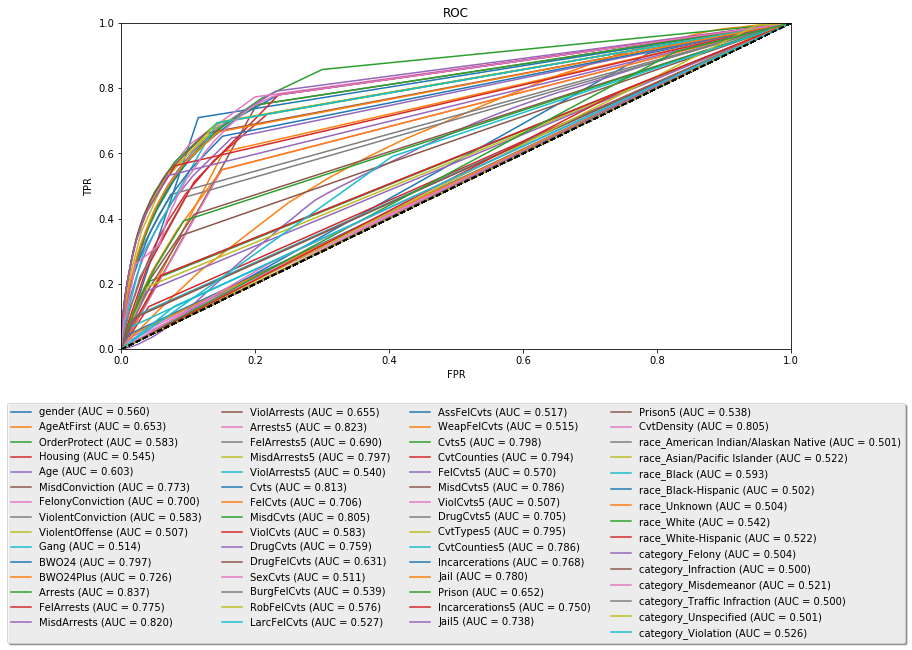

In [68]:
#Check auc scores for all features
featureset = list(X_train.columns.values)
feature_auc_dict = {}


fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)
#create a plot and set some options
for col in X_train.columns:
    feature_auc_dict[col] = AUCCal(X_train[col],Y_train,col)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
    

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [69]:
from sklearn.feature_selection import mutual_info_classif

feature_mi = mutual_info_classif(X_train,Y_train)
feature_mi_dict = dict(zip(X_train.columns.values, feature_mi))

#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_mi = pd.DataFrame(pd.Series(feature_mi_dict), columns = ['mi'])   

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_mi, left_index = True, right_index = True)
feat_imp_df

auc        mi
Age                                  0.602531  0.017537
AgeAtFirst                           0.652808  0.040040
Arrests                              0.836594  0.201348
Arrests5                             0.823176  0.199817
AssFelCvts                           0.516845  0.006676
BWO24                                0.797365  0.197391
BWO24Plus                            0.726102  0.113739
BurgFelCvts                          0.539300  0.016858
CvtCounties                          0.794114  0.164469
CvtCounties5                         0.785512  0.171389
CvtDensity                           0.805104  0.186300
CvtTypes5                            0.794999  0.180644
Cvts                                 0.812583  0.182242
Cvts5                                0.797860  0.184503
DrugCvts                             0.758823  0.136054
DrugCvts5                            0.705368  0.115289
DrugFelCvts                          0.630687  0.050031
FelArrests                           0.774756  0.139121
FelArrests5                          0.689526  0.094919
FelCvts                              0.706443  0.090048
FelCvts5                             0.569699  0.027489
FelonyConviction                     0.699847  0.092250
Gang                                 0.514050  0.003818
Housing                              0.544581  0.021549
Incarcerations                       0.767887  0.150724
Incarcerations5                      0.750065  0.156913
Jail                                 0.779615  0.163311
Jail5                                0.738418  0.149885
LarcFelCvts                          0.526843  0.009398
MisdArrests                          0.819555  0.189922
MisdArrests5                         0.797333  0.183451
MisdConviction                       0.773437  0.157745
MisdCvts                             0.805440  0.178774
MisdCvts5                            0.786416  0.180663
OrderProtect                         0.583382  0.035140
Prison                               0.652374  0.065351
Prison5                              0.538044  0.012063
RobFelCvts                           0.576286  0.033657
SexCvts                              0.511082  0.001603
ViolArrests                          0.655409  0.064318
ViolArrests5                         0.540330  0.011887
ViolCvts                             0.583455  0.028710
ViolCvts5                            0.507196  0.000899
ViolentConviction                    0.583152  0.028108
ViolentOffense                       0.506821  0.000000
WeapFelCvts                          0.514631  0.002208
category_Felony                      0.503714  0.000000
category_Infraction                  0.500169  0.001420
category_Misdemeanor                 0.521301  0.006644
category_Traffic Infraction          0.500012  0.000000
category_Unspecified                 0.500753  0.000000
category_Violation                   0.525948  0.003580
gender                               0.559848  0.013578
race_American Indian/Alaskan Native  0.500895  0.000000
race_Asian/Pacific Islander          0.522087  0.010497
race_Black                           0.593017  0.019532
race_Black-Hispanic                  0.501534  0.000609
race_Unknown                         0.503999  0.000000
race_White                           0.542038  0.009957
race_White-Hispanic                  0.522464  0.001942

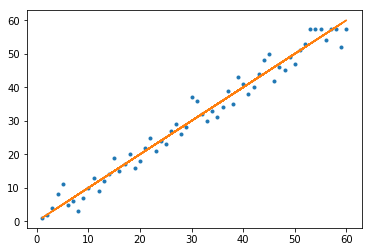

In [70]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)
#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.mi, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

We could tell from the cruve above that, the rank of auc and rank of mi forms a linear line, which is helpful in the feature selection part. We could either use auc rank or mi rank to select the features.

<h3>Part 3: Building First Models with Top features in auc and mi <h3/>

Since we have no idea how many features we should choose for the first model, with the individual auc scores, we first build the model with top 30 features to see how it performs.Even though we have no idea how to set the thredshold, we coul test it in next step.

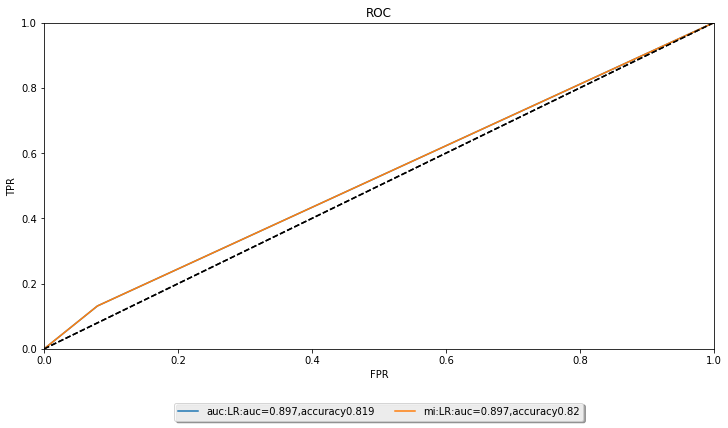

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

featureset_1_auc = list(feat_ranks[(feat_ranks.auc <= 15)].index.values)
featureset_1_mi = list(feat_ranks[(feat_ranks.mi <= 15)].index.values)

fsets = [featureset_1_auc, featureset_1_mi]
fset_descr = ['auc', 'mi']


#Plot
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

for i, fset in enumerate(fsets):
    descr = fset_descr[i]
    #set training and testing data
    X_train_1 = train[fset]
    X_test_1 = test[fset]

    #Buil Logistic Regression
    logreg1 = LogisticRegression()
    logreg1.fit(X_train_1,Y_train)
    preds_logreg1 = logreg1.predict_proba(X_test_1)[:, 1]

    fpr1, tpr1, thresholds1 = roc_curve(Y_test,preds_logreg1)
    roc_auc1 = roc_auc_score(Y_test,preds_logreg1)
    accuracy1 = logreg1.score(X_test_1, Y_test)
    
    plt.plot(fpr, tpr, label = '{}:LR:auc={},accuracy={}'.format(descr, round(roc_auc1, 3), round(accuracy1, 3)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

Two models have the same auc scores and very close accuracy score, so that in the following steps, we will only use auc scores to select features.<br/>
With Top 15 features, our first LR model has AUC 0.897 and Accuracy_Score = 0.819. It seems to be a good number, but with too many features, the model will be more complicated, which increase the variance. <br/>
So in the next step, we use two different methods to select features 

<h3>Part 3: Feature Selection</h3> 

<h4>Method 1: NAÏVE SUBSET SELECTION </h4>

In [89]:
#create a rank dataframe 
feature_test_step = np.arange(5,65,5)

featuresetname = list()
featureset = list()
for i in feature_test_step:
    featuresetname.append('feature_top_'+str(i))
    featureset.append(feat_ranks[(feat_ranks.auc <= i)].index.values)
    
feature_dict = dict(zip(featuresetname,featureset))

In [91]:
#create the function to compare the number of top n features we use to build the model
#and return the auc_score and accuracy_score

def FeatureCompare(featureset,featuresetname):
    X_train_2 = train[featureset]
    X_test_2 = test[featureset]

    #Model1:Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train_2,Y_train)
    preds_logreg = logreg.predict_proba(X_test_2)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(Y_test,preds_logreg)
    roc_auc = roc_auc_score(Y_test,preds_logreg)
    accuracy = logreg.score(X_test_2, Y_test)
    
    plt.plot(fpr, tpr, label = featuresetname + '(AUC = %0.3f,Accuracy=%0.3f)' % (roc_auc,accuracy))
    
    return roc_auc,accuracy

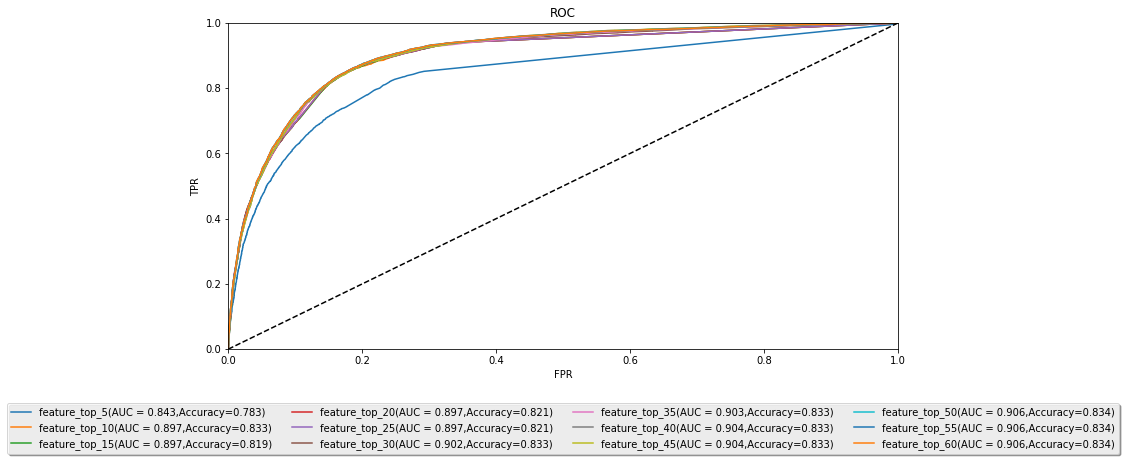

In [94]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

auc_dict = dict()
accuracy_dict = dict()
for key in feature_dict.keys():
    auc[key], accuracy[key] = FeatureCompare(feature_dict[key],key)

    

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

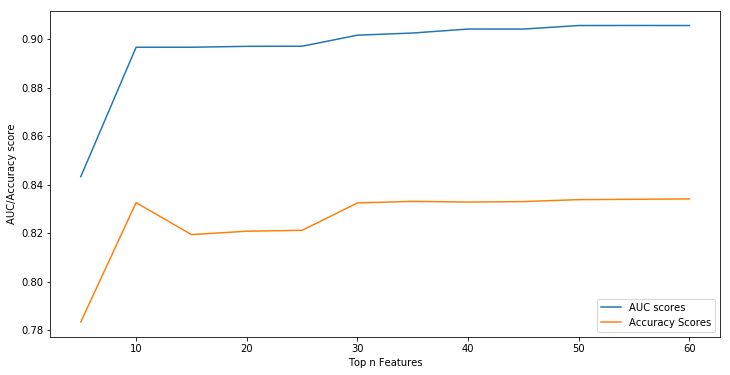

In [117]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

plt.plot(feature_test_step,list(auc.values()),label="AUC scores")
plt.plot(feature_test_step,list(accuracy.values()),label="Accuracy Scores")
ax.set_xlabel('Top n Features')
ax.set_ylabel('AUC/Accuracy score')
plt.legend(loc="lower right")



From the ROC_AUC curve above, we could tell that, the more top features we use, the higher auc score we get, however, it doesn't help us improve the model, since we build the first model with all 37 features at the begining, and it turned out to be the "best" model. We need to try another method to select the features. 

<h4>Method 2:FORWARD STEPWISE SELECTION </h4>

In this part, since we have 57 features, it takes a long time(~ 30min) to run the forward stepwise feature selection function.

In [118]:
#Define two functions to calculate the logloss and the forward_loss
def LR_LogLoss(cv, X_train, Y_train):
    ll = []
    
    for train_index, test_index in cv.split(X_train):
        X_train_f = X_train.iloc[train_index]
        X_vali_f = X_train.iloc[test_index]
        Y_train_f = Y_train.iloc[train_index]
        Y_vali_f = Y_train.iloc[test_index]
        
        logreg = LogisticRegression()
        logreg.fit(X_train_f, Y_train_f)
        P = logreg.predict_proba(X_vali_f)[:,1]
        P[P == 0] = 10**-10
        P[P == 1] = 0.99
        ll.append(-1*(((Y_vali_f==1)*np.log(P)+(Y_vali_f==0)*np.log(1-P)).mean()))
        
    mu = np.array(ll).mean()
    serr = np.array(ll).std()/np.sqrt(len(ll))
    
    return mu,serr

def LR_Forward_Loss(X_train,Y_train,cv):
    Curr_Best_Subset = set([])
    results = {}
    FeatureList = set(X_train.columns)
    k = 1
    
    while (len(FeatureList)>0):
        best_mu = 10**10
        best_serr = 10**10
        
        for f in FeatureList:
            feature_to_use = list(Curr_Best_Subset)+[f]
            mu,serr = LR_LogLoss(cv, X_train[feature_to_use], Y_train)
            if ((mu + serr) < (best_mu + best_serr)):
                best_mu = mu
                best_serr = serr
                best_f = f
                
                
        Curr_Best_Subset.add(best_f) #Add the best feature to the curr_best_set
        FeatureList = FeatureList.difference(Curr_Best_Subset) #Remove the best feature from the candidate set
        results[k] = [list(Curr_Best_Subset), best_mu, best_serr]
        k+=1
    return results

In [119]:
#Run the forward selection
cv = KFold(n_splits = 5)
r = LR_Forward_Loss(X_train, Y_train, cv)

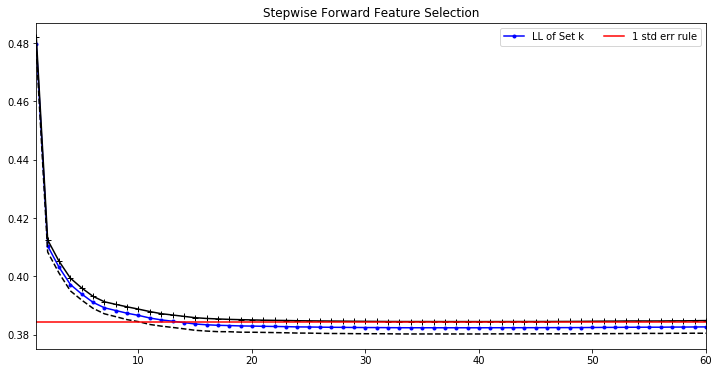

In [127]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

ks = []; mus = []; serrs = [];
for i in range(len(r.keys())):
    ks.append(i+1)
    mus.append(r[i+1][1])
    serrs.append(r[i+1][2])

    
best_1serr = min(np.array(mus) + np.array(serrs))
plt.clf()
plt.plot(ks, mus, 'b.-', label = 'LL of Set k')
plt.plot(ks, np.array(mus) + np.array(serrs), 'k+-')
plt.plot(ks, np.array(mus) - np.array(serrs), 'k--')
plt.plot(ks, np.ones(len(ks))*best_1serr, 'r', label ='1 std err rule')

plt.xlim([1,60])

plt.title('Stepwise Forward Feature Selection')
ax.set_xlabel('Greedily Selected Subset of Size k')
ax.set_ylabel('X Validated LogLoss')
    
plt.legend(loc=1, ncol=2)
plt.show()

From the curve above, we could see that as size k goes bigger, from 0 to 20, logloss decreases, and after 20, logloss seems to be plateau. By looking at the red line, we want the error less than the red line (mean + 1 std error), therefore, we pick k = 15. 

We will choose k = 15 as the best feature sets.<br/>
MisdConviction, race_White,race_Black,category_Felony,Cvts5,Housing, MisdArrests,CvtTypes5,FelCvts,AgeAtFirst,race_Asian/Pacific Islander,gender,Arrests5,CvtDensity,BWO24.

<h3> Part 4: Building 2nd LR Model with selected 15 features </h3>

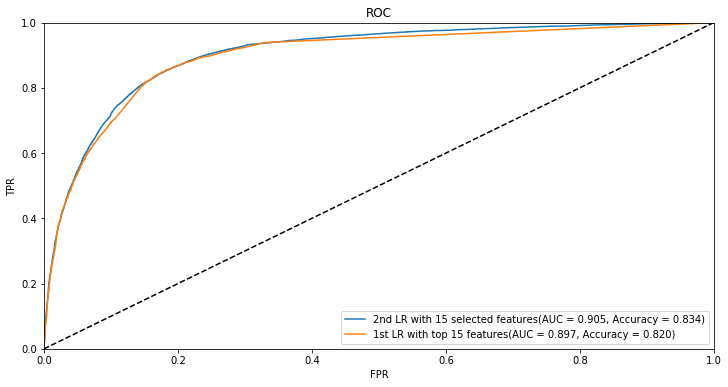

In [129]:
featureset_3 = r[15][0]
X_train_3 = train[featureset_3]
X_test_3 = test[featureset_3]


#Model3:Logistic Regression
logreg3 = LogisticRegression()
logreg3.fit(X_train_3,Y_train)
preds_logreg3 = logreg3.predict_proba(X_test_3)[:, 1]

fpr3, tpr3, thresholds3 = roc_curve(Y_test,preds_logreg3)
roc_auc3 = roc_auc_score(Y_test,preds_logreg3)
accuracy3 = logreg3.score(X_test_3, Y_test)

#Model1:Logistic Regression
logreg1 = LogisticRegression()
logreg1.fit(X_train[featureset_1_auc],Y_train)
preds_logreg1 = logreg1.predict_proba(X_test[featureset_1_auc])[:, 1]

fpr1, tpr1, thresholds3 = roc_curve(Y_test,preds_logreg1)
roc_auc1 = roc_auc_score(Y_test,preds_logreg1)
accuracy1 = logreg1.score(X_test[featureset_1_auc], Y_test)


#Plot
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)



plt.plot(fpr3, tpr3, label = '2nd LR with 15 selected features(AUC = %0.3f, Accuracy = %0.3f)' % (roc_auc3,accuracy3))
plt.plot(fpr1, tpr1, label = '1st LR with top 15 features(AUC = %0.3f, Accuracy = %0.3f)' % (roc_auc1,accuracy1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")

Compare the auc_score and accuracy_score for these two models, with selected 15 features, model 2 has a higher auc and accuracy. AUC scores increased by 0.008 and accuracy increased by 0.14. So we ended up using model2, Logistic Regression Model with 15 selected features, as our final LR model. 

<h3> Test Hyperparameters in LR </h3>

In [132]:
from sklearn.model_selection import GridSearchCV
#Step 1: Finalize the train and test data with selected features above
X_train_lr = X_train_3
X_test_lr = X_test_3
Y_train_lr = Y_train
Y_test_lr = Y_test
#Use Kfold to create 4 folds
cv = KFold(n_splits = 5)

In [139]:
#1st, set up a paramater grid
param_grid_lr = {'C':[10**i for i in range(-4, 4)], 'penalty':['l1', 'l2']}

#2nd, call the GridSearchCV class, use LogisticRegression and 'roc_auc' for scoring
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv = cv, scoring = 'roc_auc') 
lr_grid_search.fit(X_train_lr,Y_train_lr)

#3rd, get the score of the best model and print it
best_1 = lr_grid_search.best_score_
print(best_1)

0.906557109648


In [140]:
lr_grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
steps = [('scaler', StandardScaler()),
         ('lr', LogisticRegression())]

#Now set up the pipeline
pipeline = Pipeline(steps)

#Now set up the parameter grid, paying close to the correct convention here
parameters_scaler = dict(lr__C = [10**i for i in range(-3, 3)],
                  lr__penalty = ['l1', 'l2'])

#Now run another grid search
lr_grid_search_scaler = GridSearchCV(pipeline, param_grid = parameters_scaler, cv = kfolds, scoring = 'roc_auc')
lr_grid_search_scaler.fit(X, Y)


#Again, print the score of the best model
best_2 = lr_grid_search_scaler.best_score_
print(best_2)

Be carefule about the following part. Takes around 40 min.

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

#Create a set of steps. All but the last step is a transformer (something that processes data). 
# Step 1 - PolynomialFeatures
# Step 2 - StandardScaler
# Step 3 - LogisticRegression

steps_poly = [('polyfeat', PolynomialFeatures()),
         ('scaler', StandardScaler()),
         ('lr', LogisticRegression())]

#Now set up the pipeline
pipeline_poly = Pipeline(steps_poly)

#Now set up a new parameter grid, use the same paramaters used above for logistic regression, but add polynomial features up to degree 3. 
parameters_poly = dict(polyfeat__degree = [1, 2],
                       polyfeat__interaction_only = [True, False],
                       lr__C = [10**i for i in range(-4, 4)],
                       lr__penalty = ['l1', 'l2'])

#Now run another grid search
lr_grid_search_poly = GridSearchCV(pipeline_poly, param_grid = parameters_poly, cv = cv, scoring = 'roc_auc')

lr_grid_search_poly.fit(X_train_lr, Y_train_lr)
best_3 = lr_grid_search_poly.best_score_
print(best_3)

0.910230851821


In [144]:
lr_grid_search_poly.best_estimator_.steps

[('polyfeat',
  PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)),
 ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False))]

In [ ]:
import numpy as np
results = np.array([best_1, best_2, best_3])
labs = ['LR', 'Scaler-LR', 'Poly-Scaler-LR']

fig = plt.figure(facecolor = 'w', figsize = (12, 6))
ax = plt.subplot(111)

width = 0.25
ind = np.arange(3)
rec = ax.bar(ind + width, results, width, color='r')

ax.set_xticks(ind + width)
ax.set_xticklabels(labs, size = 14)
ax.set_ylim([0.5, max(results)*1.1])

plt.plot(np.arange(4), max(results) * np.ones(4))

<h3> Learning Curve </h3>